#**Temperature Prediction**
###Objective
Predict the temperature based on humidity data.

###Dataset Overview
The dataset contains hourly or daily readings of humidity and temperature.

###Workflow
1. Load the dataset
2. Explore and clean the data
3. Train a regression model
4. Evaluate predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:

import pandas as pd
df = pd.read_csv("/content/sample_data/humidity.csv")
print(df)

        sensor_id     lat     lon  pressure  temperature  humidity
0            2266  42.738  23.272  95270.27        23.46     62.48
1            2292  42.663  23.273  94355.83        23.06     59.46
2            3096  42.700  23.360  95155.81        26.53     44.38
3            3428  42.624  23.406  94679.57        28.34     38.28
4            3472  42.669  23.318  94327.88        26.31     46.37
...           ...     ...     ...       ...          ...       ...
701543       3558  42.671  23.364  95562.08        21.99     52.28
701544       3836  42.702  23.371  96070.06        21.41     56.84
701545       3296  42.671  23.325  95230.42        22.53     51.72
701546       2234  42.685  23.356  95653.14        23.01     49.78
701547       2232  42.685  23.301  95418.48        22.57     51.44

[701548 rows x 6 columns]


###Exploratory Data Analysis

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

sensor_id      0
lat            0
lon            0
pressure       0
temperature    0
humidity       0
dtype: int64
           sensor_id            lat            lon       pressure  \
count  701548.000000  701548.000000  701548.000000  701548.000000   
mean     2835.419842      42.679722      23.333739   94965.292500   
std       798.018890       0.025568       0.039365    2577.210945   
min      1764.000000      42.622000      23.240000       0.000000   
25%      2224.000000      42.665000      23.310000   94528.017500   
50%      2323.000000      42.685000      23.332000   95005.480000   
75%      3474.000000      42.694000      23.360000   95405.132500   
max      4661.000000      42.738000      23.419000  164926.750000   

         temperature       humidity  
count  701548.000000  701548.000000  
mean       24.754990      48.348949  
std        14.013001      20.907247  
min      -145.120000       0.000000  
25%        20.630000      34.140000  
50%        24.780000      48.350000

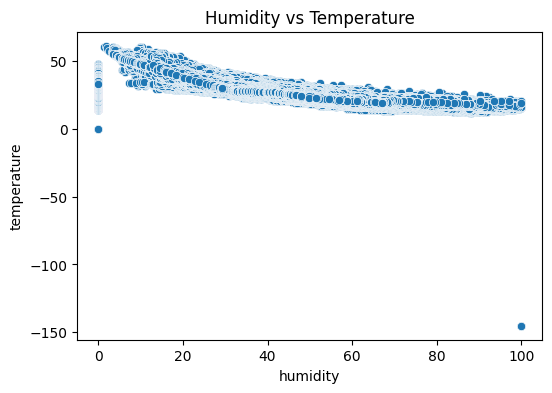

In [8]:
# Scatter plot of Humidity vs Temperature
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='humidity', y='temperature')
plt.title('Humidity vs Temperature')
plt.show()

###Data Preprocessing

In [5]:
# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target
X = df[['humidity']]
y = df['temperature']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Model Training

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

###Evaluation

R² Score: 0.2570441670365029
Mean Absolute Error: 3.8748170683297234
Mean Squared Error: 144.08481646510745


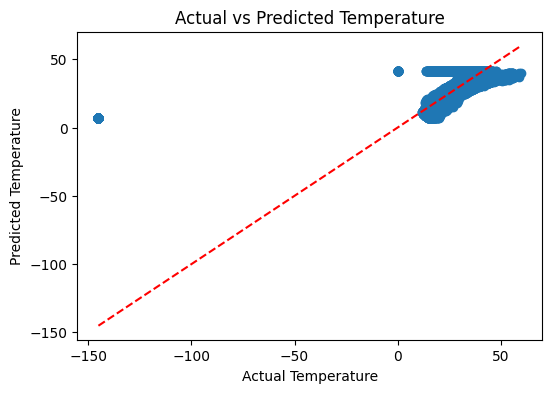

In [7]:
# Metrics
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

###Conclusion
A simple linear regression model was used to predict temperature from humidity.
Consider using polynomial regression or time-series models for more complex patterns.